# Business Understanding

Data from 2021 to 2024 was collected from the Stack Overflow Annual Developer Survey. The goal of this project was to gain insight into coding experience (yearscode).

My questions are:

Q1 - What is the most reported coding experience in years?

Q2 - What type of education is most reported in the data?

Q3 - Which age group is most reported in the data between 2021 and 2024?

Q4 - What is the most reported development type (work role)?

Q5 - Which countries have the most coding experience?

Q6 - How does age, work role, and education impact coding experience?

Q7 - Between age, work role, and education, which variable impacts coding experience the most?

# Gather Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Additional libraries used
from uuid import uuid4
import requests
import zipfile
import os

# Data Understanding & Prepare the Data

Access and Explore

In [49]:
# Download, extract, and read csv contained in the url into a dataframe.
# 2024 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2024.zip')
file_name = ('stack-overflow-developer-survey-2024.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')
x24 = df
# Remove the downloaded ZIP file from memory.
os.remove(file_name)

# This prints number of columns and all column names in the dataframe.
print("2024 data review")
print(x24.columns.size)
for column in x24.columns:
    print(f"- {column}")

# Keep the columns used to predict how features (age, devtype, and
# edlevel) impact years coding (the target variable). Additional 
# columns were kept to support future projects.
d24 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

# This lists out the kept columns and the data types.
d24.dtypes

# 2023 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2023.zip')
file_name = ('stack-overflow-developer-survey-2023.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')
x23 = df

os.remove(file_name)

# This creates a space between each of the datasets to make readability easier.
print("")

print("2023 data review")
print(x23.columns.size)
for column in x23.columns:
    print(f"- {column}")

d23 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

d23.dtypes

# 2022 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2022.zip')
file_name = ('stack-overflow-developer-survey-2022.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')
x22 = df

os.remove(file_name)

print("")
print("2022 Data Review")
print(x22.columns.size)
for column in x22.columns:
    print(f"- {column}")

d22 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

d22.dtypes

# 2021 data from https://survey.stackoverflow.co/.
url = ('https://survey.stackoverflow.co/datasets/stack-overflow-developer-survey-2021.zip')
file_name = ('stack-overflow-developer-survey-2021.zip')
response = requests.get(url)
with open(file_name, 'wb') as f:
    f.write(response.content)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extract('survey_results_public.csv')
df = pd.read_csv('survey_results_public.csv')
x21 = df

os.remove(file_name)

# Remove csv file from memory.
os.remove('survey_results_public.csv')

d21 = df[['Age', 'Country', 'DevType', 'EdLevel', 'LearnCode', 'MainBranch',
          'YearsCode']]

print("")
print("2021 Data Review")
print(x21.columns.size)
for column in x21.columns:
    print(f"- {column}")

d21.dtypes

2024 data review
114
- ResponseId
- MainBranch
- Age
- Employment
- RemoteWork
- Check
- CodingActivities
- EdLevel
- LearnCode
- LearnCodeOnline
- TechDoc
- YearsCode
- YearsCodePro
- DevType
- OrgSize
- PurchaseInfluence
- BuyNewTool
- BuildvsBuy
- TechEndorse
- Country
- Currency
- CompTotal
- LanguageHaveWorkedWith
- LanguageWantToWorkWith
- LanguageAdmired
- DatabaseHaveWorkedWith
- DatabaseWantToWorkWith
- DatabaseAdmired
- PlatformHaveWorkedWith
- PlatformWantToWorkWith
- PlatformAdmired
- WebframeHaveWorkedWith
- WebframeWantToWorkWith
- WebframeAdmired
- EmbeddedHaveWorkedWith
- EmbeddedWantToWorkWith
- EmbeddedAdmired
- MiscTechHaveWorkedWith
- MiscTechWantToWorkWith
- MiscTechAdmired
- ToolsTechHaveWorkedWith
- ToolsTechWantToWorkWith
- ToolsTechAdmired
- NEWCollabToolsHaveWorkedWith
- NEWCollabToolsWantToWorkWith
- NEWCollabToolsAdmired
- OpSysPersonal use
- OpSysProfessional use
- OfficeStackAsyncHaveWorkedWith
- OfficeStackAsyncWantToWorkWith
- OfficeStackAsyncAdmired
- O

Age           object
Country       object
DevType       object
EdLevel       object
LearnCode     object
MainBranch    object
YearsCode     object
dtype: object

In [11]:
# This merges all four of the dataframes together.
df = pd.concat([d21, d22, d23, d24], ignore_index=True)

# Clean Data & Remove Missing or Non-numberical Values

In [12]:
# Since ResponseId was not consistent across the data, OID column with
# random values was added to enable data tracking during cleaning
# process.
from uuid import uuid4
def generate_uuid(_):
    #"""
    # Generates a random OID.      
    # Returns: uuid.UUID which is randomly generated for each
    # row of data.
    # """
    return uuid4()
df['OID'] = df.index.map(generate_uuid)

In [13]:
# How many responses do we have between 2021 and 2014?
x = df['OID'].nunique()
print(f"We see {x} people completed the surveys.")

We see 311328 people completed the surveys.


In [14]:
# Review columns for null values.
print(df.isna().sum())
# Added space between print statements to make review of  
# year code column easier.
print("")
# Review Age columns for unique values.
print(df['YearsCode'].value_counts()) 

Age            3354
Country        9215
DevType       47225
EdLevel        7874
LearnCode      8634
MainBranch        0
YearsCode     11052
OID               0
dtype: int64

YearsCode
10                    22366
5                     20521
6                     18605
7                     17310
4                     17285
8                     17269
3                     15358
15                    13736
20                    12735
12                    12213
2                     11161
9                     10971
11                     8318
25                     7922
14                     7724
13                     7718
30                     6529
16                     6140
18                     5454
1                      5267
17                     4993
Less than 1 year       4439
22                     4169
40                     3902
35                     3602
23                     3416
24                     3220
21                     2629
19                     2609
26  

The <em><strong>yearscode</strong></em> column contained 11k null or missing values along with two unique string values. Since yearscode (coding experience) was an important variable, I decided to get rid of all non-numberic and null values.

- I dropped all null values since they represent less than four percent of the data.
- I dropped any string values that were not numbers.
- I dropped the null values and non-numeric values because together they represent less than 6% of the data.
- I converted the remaining numnbers, which were strings, into float data types.

<em><strong>Note:</strong></em> This was the only column where I removed the null values. No other data was removed from the dataset.

In [15]:
# Clean YearsCode column to remove non-numerical or NULL values and
# assign float datatype.
df = df.dropna(subset=['YearsCode']).reset_index(drop=True)
df = df.drop(df[df['YearsCode'] == 'Less than 1 year'].index)
df = df.drop(df[df['YearsCode'] == 'More than 50 years'].index)
df['YearsCode'] = pd.to_numeric(df['YearsCode'], errors='coerce')
df['YearsCode'] = df['YearsCode'].astype(float)

Q1 - What is the most reported coding experience in years?
Answer - The most reported coding experience is 10 years.

array([[<Axes: title={'center': 'YearsCode'}>]], dtype=object)

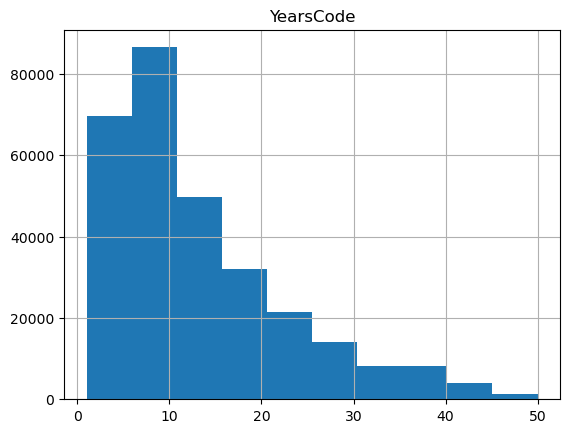

In [16]:
df.hist()

Q1 - What is the most reported coding experience in years?
Analysis - The most reported coding experience is 10 years which is below the reported average of 13 years but matches the reported median of 10 years.

In [17]:
df.describe()

,YearsCode
count,294888.000000
mean,13.238870
std,10.018758
min,1.000000
25%,6.000000
50%,10.000000
75%,18.000000
max,50.000000


In [18]:
# Review EdLevel column for null and unique values.
print(df.isna().sum())
# Added space between print statements to make review of  
# EdLevel column easier.
print("")
# Review Age columns for unique values.
print(df['EdLevel'].value_counts()) 

Age            1500
Country        1266
DevType       35530
EdLevel         288
LearnCode       639
MainBranch        0
YearsCode         0
OID               0
dtype: int64

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          124453
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        67833
Some college/university study without earning a degree                                 38040
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     30504
Associate degree (A.A., A.S., etc.)                                                     8834
Primary/elementary school                                                               6677
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                          6619
Something else                                                                          4742
Other doctoral degree (Ph.D., Ed.D., etc.)                                

The <em><strong>EdLevel</strong></em> column contained 228 null or missing values. 

- After some analysis, I kept the null values and converted them to Unknown.
- I replaced the string values with concise string values.
- The value 'something else' was converted to Unknown.

The 288 values, converted to Unknown, were unlikely to distort overall insights or trends, so I kept them.

After the values were updated, I then converted the string values to equivalent integers to maintain the ordinality of the data.

In [19]:
# Clean EdLevel column by replacing verbose string with readable
# concise value.
df['EdLevel'] = df['EdLevel'].fillna('Unknown')
dt = df['EdLevel']
dt = (dt.where
      (~dt.str.contains('Master',
                        case=False, regex=False), 'MA/MS/MEng/MBA'))
dt = (dt.where
      (~dt.str.contains('Bachelor',
                        case=False, regex=False), 'BA/BS/BEng'))
dt = (dt.where
      (~dt.str.contains('Other doctoral degree',
                        case=False, regex=False), 'Doctorate'))
dt = (dt.where
      (~dt.str.contains('Secondary',
                        case=False, regex=False), 'HS'))
dt = (dt.where
      (~dt.str.contains('Some college',
                        case=False, regex=False), 'SomeColl'))
dt = (dt.where
      (~dt.str.contains('Professional',
                        case=False, regex=False), 'Doctorate'))
dt = (dt.where
      (~dt.str.contains('Something else',
                        case=False, regex=False), 'Unknown'))
dt = (dt.where
      (~dt.str.contains('Primary',
                        case=False, regex=False), 'Elem/Mid'))
dt = (dt.where
      (~dt.str.contains('Associate',
                        case=False, regex=False), 'AA/AS'))
df['EdLevel'] = dt

# Copy edlevel values into edlevelnew column and convert values to
# integers.
normalized2 = df['EdLevel'].astype('string')
_ed2_pd = normalized2
_ed2_stripped = _ed2_pd.str.strip()
_na_like2 = {'na', 'nan', 'n/a', 'n\\a'}
normalized2 = _ed2_pd.mask(_ed2_stripped.eq('') | _ed2_stripped.str.casefold().
                           isin(_na_like2), pd.NA)
ed_map2 = {
    "Doctorate": 7,
    "MA/MS/MEng/MBA": 6,
    "BA/BS/BEng": 5,
    "AA/AS": 4,
    "SomeColl": 3,
    "HS": 2,
    "Elem/Mid": 1,
    "Unknown": 0,
}
df['EdLvlNew'] = normalized2.map(ed_map2).fillna(0).astype(int)

Q2 - What type of education is most reported in the data?

Answer - A bachelors was reported in the data over 120k times which is almost twice as much as reported masters degree according to the bar chart below.

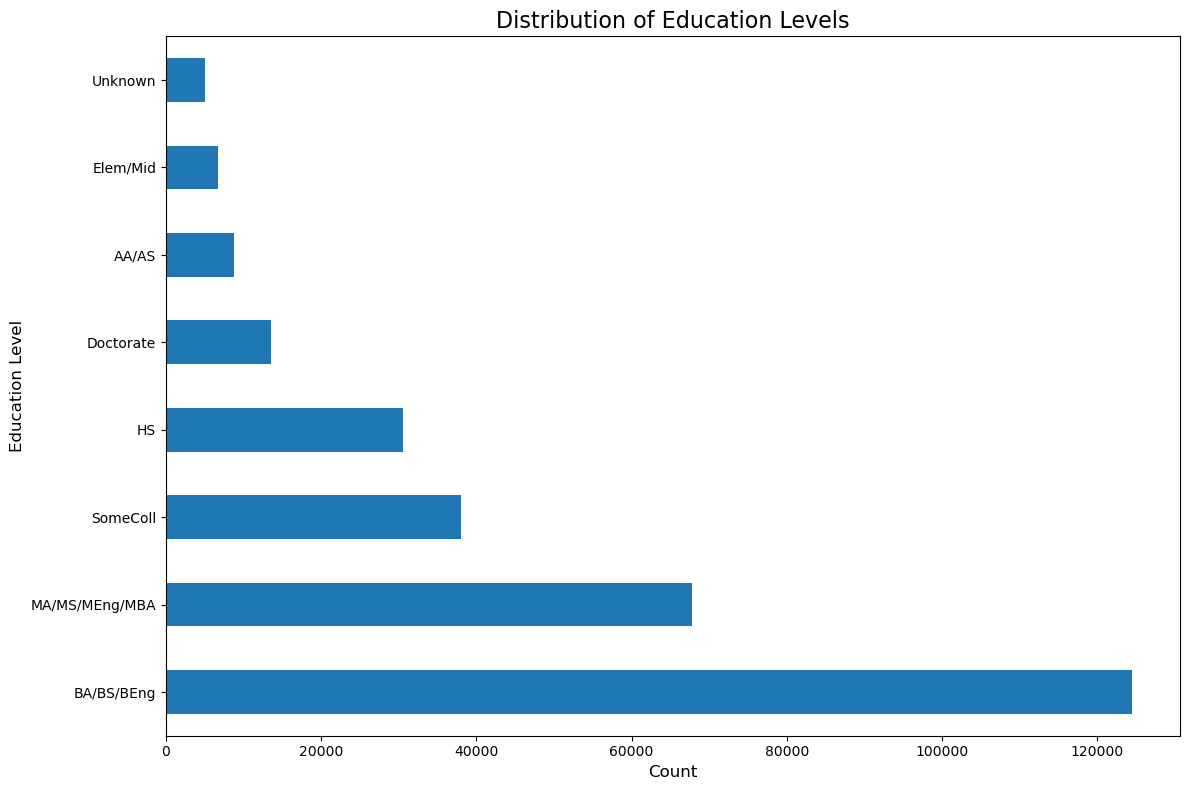

In [20]:
plt.figure(figsize=(12, 8))
ed_counts = df['EdLevel'].value_counts()
ed_counts.plot(kind='barh')
plt.title('Distribution of Education Levels', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.tight_layout()
plt.show()

In [21]:
# Review age column for null and unique values.
print(df.isna().sum())
# Added space between print statements to make review of  
# age column easier.
print("")
# Review Age columns for unique values.
print(df['Age'].value_counts()) 

Age            1500
Country        1266
DevType       35530
EdLevel           0
LearnCode       639
MainBranch        0
YearsCode         0
OID               0
EdLvlNew          0
dtype: int64

Age
25-34 years old       113458
18-24 years old        65246
35-44 years old        62739
45-54 years old        24646
Under 18 years old     14419
55-64 years old         9417
65 years or older       2020
Prefer not to say       1443
Name: count, dtype: int64


The <em><strong>Age</strong></em> column had 1500 null or missing values. 

I kept the null values and converted them to 'Not stated'.
For any any values, that contained an age and years old, under X years old, etc, they were converted to just 25-34 from 25-34 years old.
Values with 'Prefer not to say' were converted to 'Not stated'.

After the values were updated, I then converted the string values to equivalent integers to maintain the ordinality of the data.

In [22]:
# Make values in age column more concise, copy those values to the 
# AgeNew column, and convert values to integers.
df['Age'] = (df['Age'].replace('', 'Not stated').fillna
             ('Not stated'))
def _clean_age_noregex(val) -> str:
    #"""
    # Cleans and standardizes age-related strings without using 
    # import re which is also known as regex.
    # Parameters:
    # val : means any value where the age value needs to be cleaned, 
    # which can be: None, string, or other data type.
        
    # Returns: a string
    # A cleaned and standardized age string. 
    # If unput is emtpy, the value 'Not stated' is inserted.
    # If the value is 'prefer not to say', a string 'Not stated'
    # is inserted.
    # If the string contains 'years' or 'old', these strings are
    # removed. 
    # """
    
    if val is None:
        return 'Unknown'
    s = str(val).strip()
    if s.casefold() == 'prefer not to say':
        return 'Not stated'
    tokens = s.split()
    result = []
    i = 0
    while i < len(tokens):
        if tokens[i].casefold() == 'years':
            if i + 1 < len(tokens) and tokens[i + 1].casefold() == 'old':
                i += 2
                continue
            i += 1
            continue
        result.append(tokens[i])
        i += 1
    return ' '.join(result).strip()
age_pd = df['Age'].astype('string').apply(_clean_age_noregex)
df['Age'] = age_pd
df = df.drop(df[df['Age'] == 'Unknown'].index)
age_mapping = {
    "65 or older": 7,
    "55-64": 6,
    "45-54": 5,
    "35-44": 4,
    "25-34": 3,
    "18-24": 2,
    "Under 18": 1,
    "Not stated": 0,
}
df["AgeNew"] = df["Age"]
for key, value in age_mapping.items():
    df["AgeNew"] = df["AgeNew"].str.replace(key, str(value))
df["AgeNew"] = pd.to_numeric(df["AgeNew"], errors='coerce')

Q3 - Which age group is most reported in the data between 2021 and 2024?

Answer - The 25 to 34-year old group was most reported and was nearby double that of the 18 to 24-year old groups. Possibly indiciating that education does play a role in coding experience since older people might have more time to pursue additional degress. We will need to run a model to verify this hypothesis.

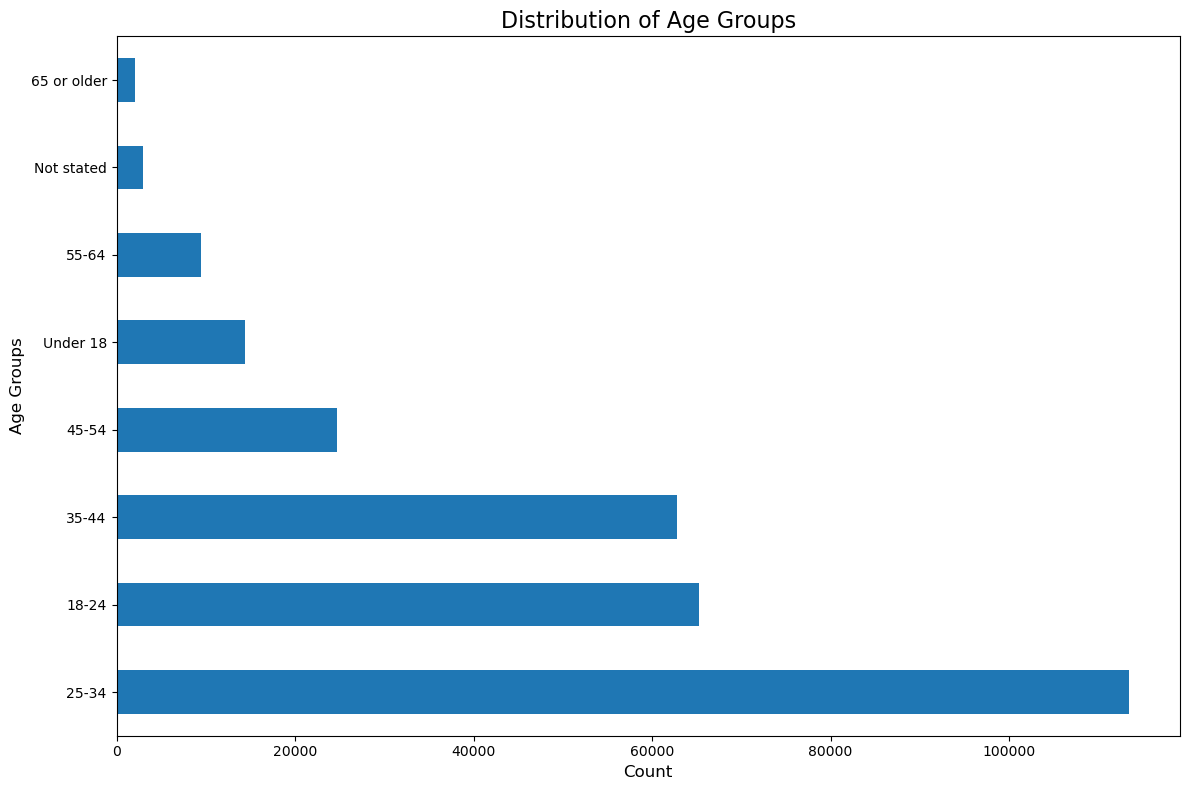

In [23]:
plt.figure(figsize=(12, 8))
ed_counts = df['Age'].value_counts()
ed_counts.plot(kind='barh')
plt.title('Distribution of Age Groups', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Age Groups', fontsize=12)
plt.tight_layout()
plt.show()

In [24]:
# Review DevType column for null and unique values.
print(df.isna().sum())
# Added space between print statements to make review of  
# age column easier.
print("")
# Review Age columns for unique values.
print(df['DevType'].value_counts()) 

Age               0
Country        1266
DevType       35530
EdLevel           0
LearnCode       639
MainBranch        0
YearsCode         0
OID               0
EdLvlNew          0
AgeNew            0
dtype: int64

DevType
Developer, full-stack                                                                                                                                                                                                                          59169
Developer, back-end                                                                                                                                                                                                                            34119
Developer, front-end                                                                                                                                                                                                                           12946
Student                                    

The <em><strong>DevType</strong></em> column had 35530 null or missing values. 

I kept the null values and converted them to 'Other'.

I converted the rest of the verbose string into more consise strings using manual review to determine which category a string belonged to.
    
After the values were updated, I then converted the string values to equivalent integers to maintain the ordinality of the data.

In [25]:
# Reduce verboseness of Devtype column.
df['DevType'] = df['DevType'].fillna('Other')
df['DevType'] = df['DevType'].astype('string')
dt = df['DevType']

# 1) Broad "Developer" group
dt = (dt.where
      (~dt.str.contains('Developer',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('DevOps',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineering manager',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineer, site reliability;Educator;' 
                        'Database administrator',
                        case=False, regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Research & Development role',
                        case=False,regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Engineer, site reliability',
                        case=False,regex=False), 'Developer'))
dt = (dt.where
      (~dt.str.contains('Cloud infrastructure engineer;Scientist',
                        case=False, regex=False), 'Developer'))

# 2) Data roles
dt = (dt.where
      (~dt.str.contains('Data scientist or machine learning specialist',
                        case=False, regex=False), 'Data Scientist'))
dt = (dt.where
      (~dt.str.contains('Scientist',
                        case=False, regex=False),'Data Scientist'))
dt = (dt.where
      (~dt.str.contains('Engineer, data',
                        case=False, regex=False),'Data Engineer'))
dt = (dt.where
      (~dt.str.contains('Data engineer',
                        case=False, regex=False),'Data Engineer'))
dt = (dt.where
      (~dt.str.contains('Engineer, data;Academic researcher',
                        case=False, regex=False), 'Data Analyst'))
dt = (dt.where
      (~dt.str.contains('Data or business analyst',
                        case=False,regex=False), 'Data Analyst'))

# 3) Other catch-alls
dt = (dt.where
      (~dt.str.contains('Other',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Project manager',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Product manager',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Educator;Designer',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Student;Designer;Marketing or sales professional',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Educator;Blockchain',
                        case=False, regex=False),'Other'))
dt = (dt.where
      (~dt.str.contains('Educator',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Designer',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Academic researcher',
                        case=False, regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Marketing or sales professional',
                        case=False,regex=False), 'Other'))
dt = (dt.where
      (~dt.str.contains('Student',
                        case=False, regex=False), 'Other'))

# 4) Specific titles
dt = (dt.where
      (~dt.str.contains('Scientist;Blockchain',
                        case=False,regex=False), 'Blockchain'))
dt = (dt.where
      (~dt.str.contains('Senior Executive (C-Suite, VP, etc.)',
                        case=False, regex=False), 'Executive'))
dt = (dt.where
      (~dt.str.contains('Cloud infrastructure engineer',
                        case=False,regex=False), 'Cloud Engineer'))
dt = (dt.where
      (~dt.str.contains('Security professional',
                        case=False, regex=False), 'Cyber/Network Engineer'))
dt = (dt.where
      (~dt.str.contains('System administrator',
                        case=False,regex=False), 'IT'))
dt = (dt.where
      (~dt.str.contains('Database administrator',
                        case=False,regex=False), 'IT'))
dt = (dt.where
      (~dt.str.contains('Hardware Engineer',
                        case=False,regex=False), 'IT'))
df['DevType'] = dt


# Copy new values from DevType column to DevTypeNew column and convert
# values to integers.
dev_type_mapping = {
    "Developer": 7,
    "Data Scientist": 7,
    "Data Engineer": 7,
    "Cloud Engineer": 7,
    "Cyber/Network Engineer": 6,
    "IT": 5,
    "Blockchain": 4,
    "Executive": 3,
    "Data Analyst": 2,
    "Other": 1,
}
df["DevTypeNew"] = df["DevType"]
for key, value in dev_type_mapping.items():
    df["DevTypeNew"] = df["DevTypeNew"].str.replace(key, str(value))
df['DevTypeNew'] = df['DevTypeNew'].astype(int)

Q4 - What is the most reported development type (work role)?

Answer - The developer was the most reported work role dwarfing all other work roles including the data science work role, indicating that coding experience is significnatly more important to developers than data scientists. This could also be because data science is relatively new compared to developers. Interestingly, the data science work role was reported less than the 'Other' workroles which included academics, or hobbysts.

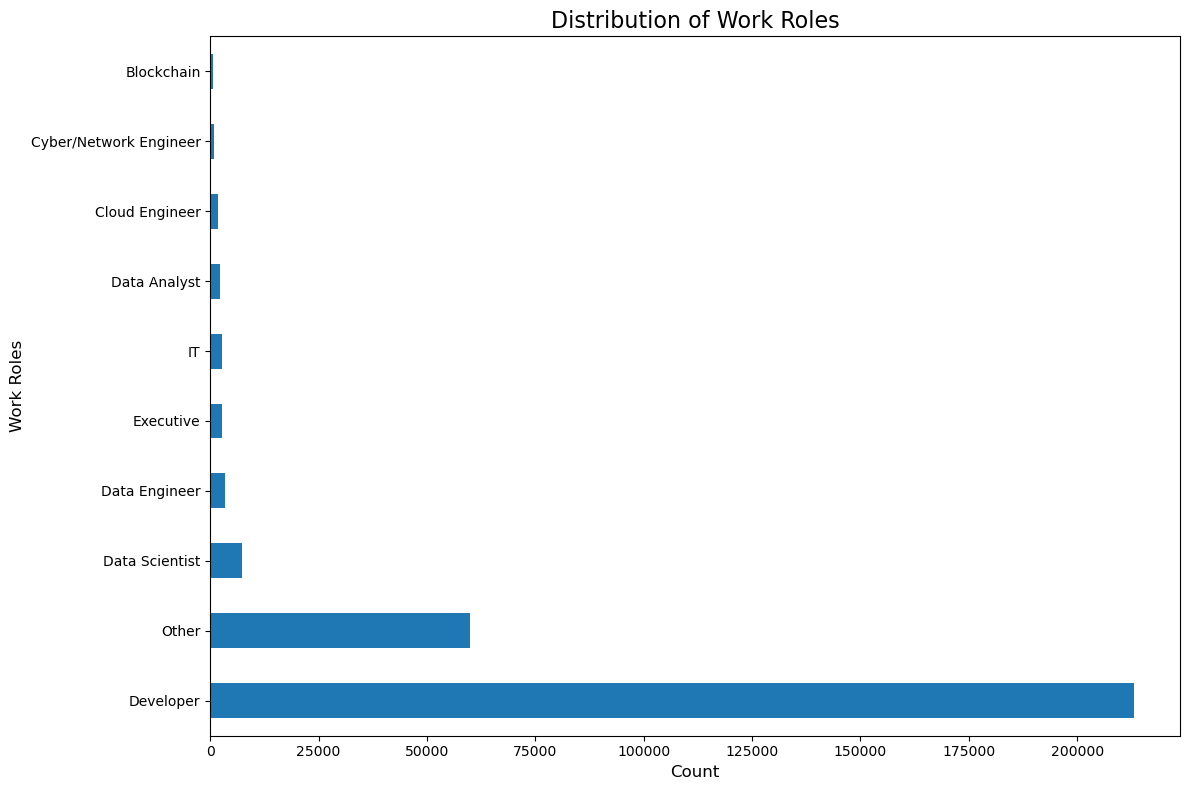

In [26]:
plt.figure(figsize=(12, 8))
ed_counts = df['DevType'].value_counts()
ed_counts.plot(kind='barh')
plt.title('Distribution of Work Roles', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Work Roles', fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
print(df['DevType'].value_counts()) 

DevType
Developer                 213053
Other                      59979
Data Scientist              7415
Data Engineer               3422
Executive                   2775
IT                          2681
Data Analyst                2205
Cloud Engineer              1827
Cyber/Network Engineer       957
Blockchain                   574
Name: count, dtype: Int64


In [28]:
# Review MainBranch column for null and unique values.
print(df.isna().sum())
# Added space between print statements to make review of  
# MainBranch column easier.
print("")
# Review Age columns for unique values.
print(df['MainBranch'].value_counts()) 

Age              0
Country       1266
DevType          0
EdLevel          0
LearnCode      639
MainBranch       0
YearsCode        0
OID              0
EdLvlNew         0
AgeNew           0
DevTypeNew       0
dtype: int64

MainBranch
I am a developer by profession                                                           222686
I code primarily as a hobby                                                               16885
I am not primarily a developer, but I write code sometimes as part of my work/studies     14615
I am learning to code                                                                     12229
I am not primarily a developer, but I write code sometimes as part of my work             12012
I am a student who is learning to code                                                    10635
I used to be a developer by profession, but no longer am                                   5497
None of these                                                                               32

The <em><strong>MainBranch</strong></em> didnt have any null or missing values. 

I just made this column more concise.

In [29]:
#Simplify MainBranch values
mainbranch_mapping = {
    'I am a developer by profession': 'Dev',
    'I am a student who is learning to code': 'Student',
    'I used to be a developer by profession, but no longer am'
    : 'DevPrevious',
    'I am not primarily a developer, but I write code sometimes as part of '
    'my work': 'CodeForWork',
    'I code primarily as a hobby'
    : 'Hobby',
    'None of these'
    : 'Unknown',
    'I am learning to code'
    : 'Student',
    'I am not primarily a developer, but I write code sometimes as part of '
    'my work/studies': 'CodeForWorkStudy'
}
df['MainBranch'] = (df['MainBranch'].astype('string').str.strip().map
                    (mainbranch_mapping))

In [30]:
# Review MainBranch column for null and unique values.
print(df.isna().sum())
# Added space between print statements to make review of  
# Country column easier.
print("")
# Review Age columns for unique values.
print(df['Country'].value_counts()) 

Age              0
Country       1266
DevType          0
EdLevel          0
LearnCode      639
MainBranch       0
YearsCode        0
OID              0
EdLvlNew         0
AgeNew           0
DevTypeNew       0
dtype: int64

Country
United States of America                                57135
India                                                   25455
Germany                                                 22979
United Kingdom of Great Britain and Northern Ireland    17106
Canada                                                  10858
                                                        ...  
Seychelles                                                  1
Marshall Islands                                            1
Grenada                                                     1
Equatorial Guinea                                           1
Nauru                                                       1
Name: count, Length: 195, dtype: int64


The <em><strong>Country</strong></em> didnt have any null or missing values. 

I just made this column more concise.

In [31]:
# Clean country column and convert names to abbreviations where possible.
_country = df['Country'].astype('string').str.strip()
_exact_map = {
    'United Kingdom of Great Britain and Northern Ireland': 'UK',
    'United States of America': 'USA',
    'Bosnia and Herzegovina': 'Bosnia',
    'Brunei Darussalam': 'Brunei',
    "Côte d'Ivoire": 'Ivory Coast',
    "CÃ´te d'Ivoire": 'Ivory Coast',
    'Central African Republic': 'CAR',
    'Democratic Republic of the Congo': 'DRC',
    'Republic of Moldova': 'Maldova',
    'Republic of North Macedonia': 'N. Macedonia',
    'The former Yugoslav Republic of Macedonia': 'N. Macedonia',
    'Russian Federation': 'Russia',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
}
_country = _country.replace(_exact_map)
_lower = _country.str.casefold()
_country = (_country.mask(_country.str.startswith
                          ('Congo, Republic of the',na=False),
                          'Congo'))
_country = _country.mask(_lower.str.contains
                         ('hong kong',na=False,regex=False),
                         'Hong Kong')
_country = _country.mask(_country.str.startswith
                         ('Iran, Islamic Republic of',na=False),
                         'Iran')
_country = _country.mask(_country.eq
                         ("Lao People's Democratic Republic"),
                         'Laos')
_country = _country.mask(_country.str.startswith
                         ('Micronesia, Federated States ''of',na=False),
                         'Micronesia')
_country = _country.mask(_country.isin
                         (['Republic of Korea','South Korea']),
                         'S. Korea')
_country = _country.mask(_country.eq
                         ("Democratic People's Republic of Korea"),
                         'N. Korea')
_country = _country.mask(_country.str.startswith
                         ('Venezuela, Bolivarian Republic'' of', na=False),
                         'Venezuela')
_country = _country.mask(_lower.eq
                         ('hong kong'),
                         'China')
df['Country'] = _country

Q5 - Which countries have the most coding experience?

Answer - The US has a little less than half of the coding talent from a total numbers perspective. This might explain why most of the top tech companies are American. It would be interesting to see how the data changes when we account for coding talent against total population for each country. 

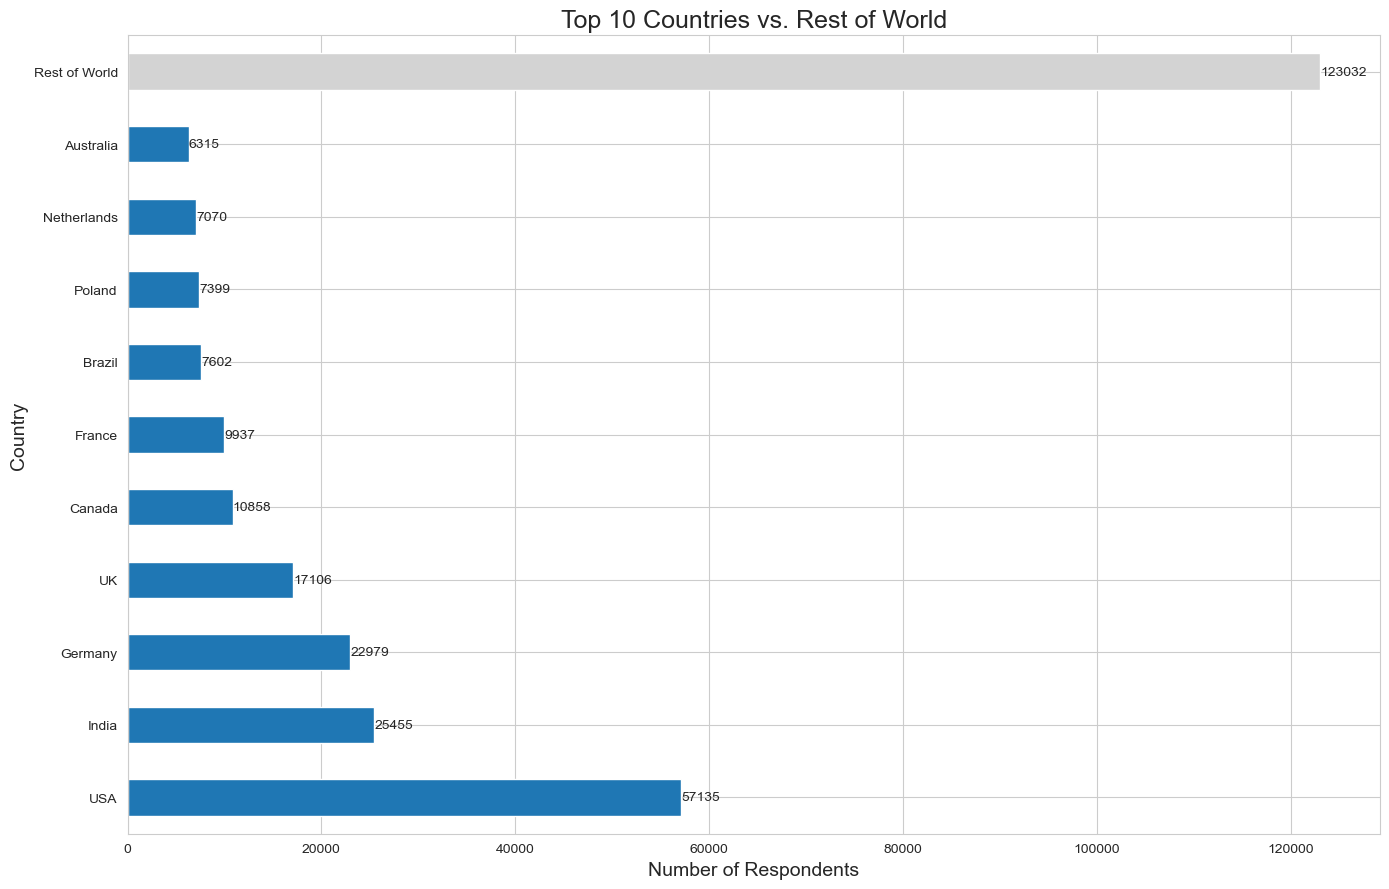

In [32]:
# Bar chart showing top 10 countries reported in the data compared
# to rest of the world.
sns.set_style("whitegrid")
plt.figure(figsize=(14, 9))
country_counts = df['Country'].value_counts()
top_10_countries = country_counts.head(10)
other_countries_sum = country_counts[10:].sum()
plot_data = top_10_countries.copy()
plot_data["Rest of World"] = other_countries_sum
ax = plot_data.plot(kind='barh', color=['#1f77b4'] * 10 + ['#d3d3d3'])  # Last bar gray
plt.title('Top 10 Countries vs. Rest of World', fontsize=18)
plt.xlabel('Number of Respondents', fontsize=14)
plt.ylabel('Country', fontsize=14)
for i, v in enumerate(plot_data):
    ax.text(v + 5, i, str(v), va='center')
plt.tight_layout()
plt.show()


In [34]:
# Prepare the data for normalization, model training, and 
# manual review of data.
df['YearNorm'] = df['YearsCode']

df = df[['Age', 'AgeNew', 'DevType', 'DevTypeNew', 'EdLevel', 'EdLvlNew',
         'YearsCode', 'YearNorm', 'Country', 'MainBranch', 'OID']]

df['YearsCode'] = df['YearsCode'].astype(int)

# Convert dataframe to CSV to store data.
df.to_csv('CleanData.csv', index=False)

# Convert CSV to dataframe for next step.
df = pd.read_csv("CleanData.csv")

C:\Users\Little\AppData\Local\Temp\ipykernel_14148\4282687290.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCode'] = df['YearsCode'].astype(int)


# Normalize the data

In [35]:
# Normalize data
column_names_to_normalize = ['YearNorm']
df[column_names_to_normalize] = ((df[column_names_to_normalize]
                                 -df[column_names_to_normalize].min()) /
                                 (df[column_names_to_normalize].max()
                                 -df[column_names_to_normalize].min()))
dp = df[['AgeNew', 'DevTypeNew', 'EdLvlNew', 'YearNorm']]

# Target and feature variables set for model training.
y = dp['YearNorm']
X = dp[['AgeNew', 'DevTypeNew', 'EdLvlNew']]

# Train a random forest regressor model

This model was selected because the target variable is continuous while the feature variables are ordinal categories. 

The linear regression model was appealing based on simplicity and interpretability, though it was not attempted because not all variables were continuous, only the target variable. A lack of bimodal features (without additional processing) precluded the application of the tree classification model. A third model, the random forest regressor was chosen due to it popularity and ability to handle both continuous and categorical values.

In [36]:
# Model train start.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Create a Random Forest Regressor. Random forest chosen since target variable
# is continuous and feature variables are ordinal.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Q6 - How does age, work role, and education impact coding experience?

Answer - These feature variables definitely impact coding experience based on a solid model with a good R-squared score of 63.92%. The model was off by less than a year according to the mean squared error of 0.0150.

In [37]:
# Make predictions.
y_pred = rf_model.predict(X_test)

# Calculate regression metrics using numpy.
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  

# Calculate regression metric R2 using sklearn.
r2 = r2_score(y_test, y_pred)  

# Print regression metrics.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0142
Root Mean Squared Error: 0.1192
Mean Absolute Error: 0.0865
R² Score: 0.6568


Q7 - Between age, work role, and education, which variable impacts coding experience the most?

Answer - When we isoate the features, it turns out the age is the single best predicter for coding experience while work role and education have significantly less influence.

In [38]:
X = dp[['AgeNew']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  
r2 = r2_score(y_test, y_pred)  

# Print regression metrics for age.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0147
Root Mean Squared Error: 0.1211
Mean Absolute Error: 0.0880
R² Score: 0.6459


In [39]:
X = dp[['DevTypeNew']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  
r2 = r2_score(y_test, y_pred)  

# Print regression metrics for age.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0391
Root Mean Squared Error: 0.1978
Mean Absolute Error: 0.1524
R² Score: 0.0542


In [40]:
X = dp[['EdLvlNew']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)  
mae = np.mean(np.abs(y_test - y_pred))  
r2 = r2_score(y_test, y_pred)  

# Print regression metrics for age.
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0380
Root Mean Squared Error: 0.1950
Mean Absolute Error: 0.1500
R² Score: 0.0808
